![myimage](https://images.pexels.com/photos/160107/pexels-photo-160107.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940)

# Welcome to my interactive POS tagger! 

## POS tagging is useful in determining sentence structures in a given language, which helps learners to understand its grammar. Thanks to tags, it is easier to define the style of the text as well as its nature.

> ### By using my app, it is possible to select a website and POS tag it. 
> ### You can download the results later. 

### 1. Choosing a website

First, select the website you want to analyze.

In [3]:
website = input("Paste your website address: ")

Paste your website address: https://www.theguardian.com/politics/live/2021/jun/10/uk-covid-live-news-latest-updates-matt-hancock-pandemic-coronavirus-brexit-g7


### 2. Cleaning the data

Now we have to extract the text itself, clearing the page content from unnecessary data.

In [4]:
import requests
page = requests.get(website)

In [5]:
from bs4 import BeautifulSoup
import requests
import nltk

response = requests.get(website).content
soup = BeautifulSoup(response, "html.parser")
tokens = nltk.tokenize.word_tokenize(soup.get_text())


In [6]:
punc = "—”!()-[]{}';:\,<>./?@#$%^&*_~–|1234567890"
punc = list(punc)
for element in punc:
    try:
        while True:
            tokens.remove(element)
    except ValueError:
        pass

### 3. Analyzing the data

Having prepared the content, we can finally analyze it. Here, I will apply tokenization and tagging.

In [7]:
tagged = nltk.pos_tag(tokens)

In [34]:
from collections import Counter
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

dictionary_counter_num = Counter([j for i,j in tagged])
print(dictionary_counter_num)

Counter({'NNP': 699, 'NN': 389, 'IN': 295, 'DT': 247, 'JJ': 156, 'NNS': 128, 'CD': 102, 'TO': 94, 'VB': 89, 'VBD': 86, 'PRP': 81, 'CC': 78, 'VBZ': 72, 'RB': 71, 'VBG': 50, 'VBN': 47, 'VBP': 44, 'PRP$': 36, 'MD': 25, 'WDT': 10, 'WP': 9, 'NNPS': 7, 'WRB': 7, 'RP': 6, 'POS': 6, 'PDT': 5, 'EX': 5, 'JJS': 4, 'RBR': 4, "''": 4, '``': 2, 'RBS': 2, ':': 2, 'JJR': 2, 'FW': 1})


### 4. Creating a bar chart

To visualize the result we will use a bar chart with the help of the matplotlib module.

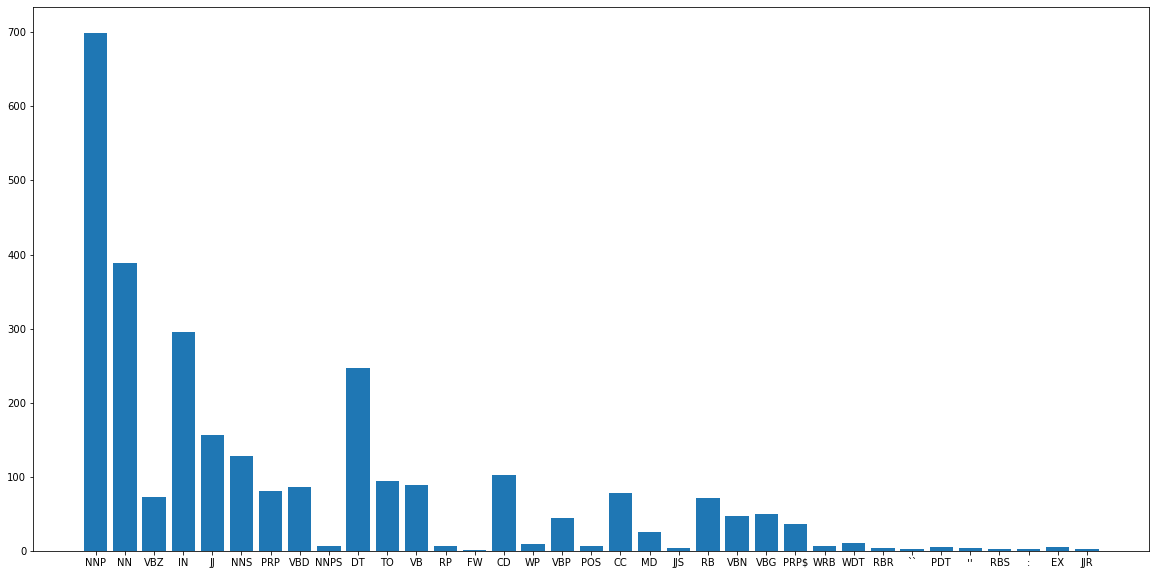

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(dictionary_counter_num)), list(dictionary_counter_num.values()), align='center')
plt.xticks(range(len(dictionary_counter_num)), list(dictionary_counter_num.keys()))
plt.show()

### Summary

Now, when we have the results, we can calculate the percentage of the most common parts of speech.

First, I will calculate the total amount of tokens we have obtained. Then I shall divide the frequency number of the two most common parts of speech (n) by the total number of tokens (x), which will present their percentage in the text (y).

$$ \frac{n}{x} =  y*100 $$

In [33]:
one = list(dictionary_counter_num.items())[0]
two = list(dictionary_counter_num.items())[1]
one_k = one[1]
two_k = two[1]
total = len(tokens)
print("Total number of tokens: ", len(tokens))
print("Percentage of each POS: ", one[0], "-", round(one_k/total*100,2),"%, ", two[0], "-", round(two_k/total*100,2),"%")


Total number of tokens:  2865
Percentage of each POS:  NNP - 24.4 %,  NN - 13.58 %
